In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MaxAbsScaler, StandardScaler 
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,make_scorer
from sklearn.feature_selection import SelectKBest,f_classif
from numpy import set_printoptions

In [2]:
df= pd.read_csv('df_client.csv')

In [3]:
df

,Country_Code,BR Code,Period,Client,risk_rating,Self_exclude_flag,Variable_1_Y0,Variable_1_Y1,Variable_1_Y2,Variable_1_Y3,...,Variable_28_Y1,Variable_28_Y2,Variable_28_Y3,Variable_29_Y0,Variable_29_Y1,Variable_29_Y2,Variable_30_Y0,Variable_30_Y1,Variable_30_Y2,Variable_30_Y3
0,0,0,2017Q2,0,7,1,581103.4591,612122.5165,589483.6484,608043.5063,...,572312.4225,601762.9316,574251.4130,577170.3096,594024.8975,616177.8226,588163.8327,623659.1015,608794.9055,574860.5510
1,0,0,2016Q1,0,7,1,608189.3682,581513.6158,609292.1500,NaN,...,608263.6088,605605.1646,NaN,581951.0166,608354.2362,623470.1198,591055.8212,592011.4052,572734.0028,NaN
2,0,0,2015Q4,0,7,1,626775.4450,620338.8464,NaN,NaN,...,621396.2940,NaN,NaN,590490.3620,620329.2616,NaN,626221.0887,572241.0321,NaN,NaN
3,0,0,2015Q2,0,7,1,613152.4469,595630.8819,NaN,NaN,...,589714.2432,NaN,NaN,580633.8747,576235.2813,NaN,619098.6619,578761.7137,NaN,NaN
4,0,1,2019Q1,1,9,0,615840.2415,603501.2067,587601.9393,610071.5454,...,607400.3547,570273.9177,573434.8221,572413.5987,618435.4264,587802.7283,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28219,1,5,2019Q3,14029,9,0,613443.8602,613837.1051,612822.9576,606593.2323,...,610030.8910,618505.1700,617951.2211,595971.9016,578062.5093,599639.0280,580449.8830,611674.9248,580422.2262,597456.6193
28220,0,18,2019Q2,14030,7,1,617117.2363,605957.6693,585445.4837,602436.1448,...,593354.5831,589754.9621,626103.7917,574046.2844,578293.7648,592496.9123,573213.7193,610247.3553,588799.7333,612401.2087
28221,0,18,2017Q2,14030,7,1,598289.6179,612797.3290,620478.2230,626770.6208,...,581177.1317,574269.4064,585628.9203,609955.0658,605017.3787,605023.4282,626190.4213,569991.4646,623427.1906,574786.2230
28222,0,3,2019Q4,14031,10,0,598340.2456,583005.7009,600366.4495,615014.1698,...,582732.5056,572852.5749,627308.6765,NaN,NaN,NaN,569126.3676,581899.7853,615179.7077,577086.5751


# Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28224 entries, 0 to 28223
Columns: 124 entries, Country_Code to Variable_30_Y3
dtypes: float64(118), int64(5), object(1)
memory usage: 26.7+ MB


In [4]:
#variable columns contains more null values
df.isnull().sum()

Country_Code          0
BR Code               0
Period                0
Client                0
risk_rating           0
                  ...  
Variable_29_Y2    12829
Variable_30_Y0     1263
Variable_30_Y1     3071
Variable_30_Y2     8981
Variable_30_Y3    14540
Length: 124, dtype: int64

<AxesSubplot:>

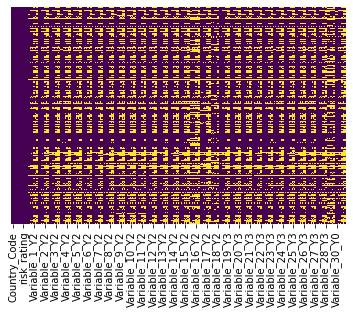

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df[df.columns[6:]].describe()

,Variable_1_Y0,Variable_1_Y1,Variable_1_Y2,Variable_1_Y3,Variable_2_Y0,Variable_2_Y1,Variable_2_Y2,Variable_2_Y3,Variable_3_Y0,Variable_3_Y1,...,Variable_28_Y1,Variable_28_Y2,Variable_28_Y3,Variable_29_Y0,Variable_29_Y1,Variable_29_Y2,Variable_30_Y0,Variable_30_Y1,Variable_30_Y2,Variable_30_Y3
count,2.762700e+04,2.586300e+04,1.979000e+04,1.403800e+04,2.784300e+04,2.601400e+04,1.993200e+04,1.411200e+04,2.734900e+04,2.550600e+04,...,2.552300e+04,1.951900e+04,1.386100e+04,2.169100e+04,2.007700e+04,1.539500e+04,2.696100e+04,2.515300e+04,1.924300e+04,1.368400e+04
mean,6.361683e+05,6.255434e+05,6.199159e+05,6.035381e+05,9.638515e+05,8.844338e+05,8.171213e+05,6.460637e+05,6.769672e+05,6.607056e+05,...,6.735388e+05,6.475524e+05,6.133602e+05,6.135305e+05,6.300395e+05,6.141309e+05,6.280562e+05,6.179608e+05,6.098195e+05,6.142454e+05
std,2.534747e+06,1.948390e+06,1.435195e+06,2.886253e+05,2.261716e+07,1.888660e+07,1.477175e+07,4.283860e+06,5.044544e+06,4.216635e+06,...,6.241107e+06,3.138976e+06,1.354950e+06,2.657733e+06,2.148632e+06,9.090970e+05,2.569235e+06,1.975915e+06,1.484809e+06,1.823014e+06
min,5.128563e+05,-3.146795e+07,2.525116e+05,4.955749e+05,5.599812e+05,5.398996e+05,5.668177e+05,5.687134e+05,5.619519e+05,5.685909e+05,...,-7.580762e+07,-9.767314e+05,2.406058e+05,-1.371327e+08,-3.986763e+07,2.731502e+05,5.685834e+05,5.629810e+05,5.685859e+05,5.685953e+05
25%,5.852308e+05,5.850355e+05,5.846249e+05,5.845827e+05,5.900640e+05,5.892383e+05,5.891779e+05,5.888727e+05,5.857249e+05,5.854415e+05,...,5.855224e+05,5.856512e+05,5.858692e+05,5.842698e+05,5.843789e+05,5.841503e+05,5.840446e+05,5.840872e+05,5.839063e+05,5.832919e+05
50%,6.001003e+05,6.001220e+05,5.994853e+05,5.995705e+05,6.061964e+05,6.056190e+05,6.052093e+05,6.049227e+05,6.010245e+05,6.012923e+05,...,6.010297e+05,6.011987e+05,6.012206e+05,5.995226e+05,5.996911e+05,5.995108e+05,5.992824e+05,5.991207e+05,5.987380e+05,5.984169e+05
75%,6.150846e+05,6.151414e+05,6.148627e+05,6.147271e+05,6.221283e+05,6.216166e+05,6.210089e+05,6.207489e+05,6.163980e+05,6.163222e+05,...,6.163736e+05,6.165036e+05,6.162331e+05,6.147727e+05,6.149093e+05,6.147426e+05,6.140784e+05,6.141032e+05,6.139447e+05,6.137102e+05
max,2.604143e+08,2.179120e+08,1.169845e+08,3.203595e+07,2.166944e+09,2.014883e+09,1.201073e+09,5.094401e+08,4.272355e+08,3.985871e+08,...,8.893915e+08,2.312333e+08,1.600847e+08,2.364972e+08,2.002159e+08,6.435231e+07,3.145844e+08,2.407651e+08,2.065533e+08,2.138410e+08


In [5]:
df[df.columns[6:]].mean()

Variable_1_Y0     636168.263598
Variable_1_Y1     625543.418601
Variable_1_Y2     619915.884113
Variable_1_Y3     603538.057743
Variable_2_Y0     963851.482350
                      ...      
Variable_29_Y2    614130.922869
Variable_30_Y0    628056.196451
Variable_30_Y1    617960.770337
Variable_30_Y2    609819.477346
Variable_30_Y3    614245.417600
Length: 118, dtype: float64

In [6]:
df[df.columns[6:]].std()

Variable_1_Y0     2.534747e+06
Variable_1_Y1     1.948390e+06
Variable_1_Y2     1.435195e+06
Variable_1_Y3     2.886253e+05
Variable_2_Y0     2.261716e+07
                      ...     
Variable_29_Y2    9.090970e+05
Variable_30_Y0    2.569235e+06
Variable_30_Y1    1.975915e+06
Variable_30_Y2    1.484809e+06
Variable_30_Y3    1.823014e+06
Length: 118, dtype: float64

As per above mean and std stats none of the column contains outliers, therefore we'll replace missing values with mean of that columns

In [7]:
#fill missing values with mean because there's low std of the columns
df[df.columns[6:]]= df[df.columns[6:]].fillna(df[df.columns[6:]].mean())

In [8]:
#check distribution of values
df['Country_Code'].value_counts(normalize=True)

0    0.673080
1    0.326176
2    0.000744
Name: Country_Code, dtype: float64

In [9]:
#check distribution of values
df['BR Code'].value_counts(normalize=True)

5      0.326176
12     0.078408
4      0.058355
21     0.042375
30     0.037025
         ...   
100    0.000071
65     0.000035
99     0.000035
78     0.000035
104    0.000035
Name: BR Code, Length: 106, dtype: float64

In [10]:
#check distribution of values
df['Client'].value_counts(normalize=True)

3666     0.000461
2679     0.000461
2946     0.000461
1655     0.000425
289      0.000390
           ...   
9552     0.000035
11601    0.000035
13650    0.000035
11407    0.000035
2047     0.000035
Name: Client, Length: 12128, dtype: float64

In [11]:
#check distribution of values
df['risk_rating'].value_counts(normalize=True)

7     0.208227
6     0.200397
8     0.182894
5     0.142184
4     0.091624
9     0.070826
10    0.030293
3     0.028451
11    0.017786
12    0.007795
2     0.007759
13    0.005315
17    0.004323
14    0.001134
15    0.000602
1     0.000390
Name: risk_rating, dtype: float64

In [12]:
df['Self_exclude_flag'].value_counts(normalize=True)

1    0.861926
0    0.138074
Name: Self_exclude_flag, dtype: float64

In [13]:
df['quarter'] = df['Period'].str[-2:]

In [14]:
df['quarter'].value_counts(normalize=True)

Q1    0.278770
Q4    0.268814
Q3    0.245040
Q2    0.207377
Name: quarter, dtype: float64

In [15]:
df['quarter']= df['quarter'].map({'Q1':1,'Q2':2,'Q3':3,'Q4':4})

In [16]:
#quarter is positively corelated
df[['quarter','Self_exclude_flag']].corr()

,quarter,Self_exclude_flag
quarter,1.000000,-0.012602
Self_exclude_flag,-0.012602,1.000000


In [17]:
#there's not strong corelation b/w BR Code and target
df[['BR Code','Self_exclude_flag']].corr()

,BR Code,Self_exclude_flag
BR Code,1.000000,-0.003633
Self_exclude_flag,-0.003633,1.000000


# Modeling

In [18]:
X,y= df.drop(['Country_Code','BR Code','Period','Client','risk_rating','Self_exclude_flag'],axis=1) , df['risk_rating']

In [19]:
X

,Variable_1_Y0,Variable_1_Y1,Variable_1_Y2,Variable_1_Y3,Variable_2_Y0,Variable_2_Y1,Variable_2_Y2,Variable_2_Y3,Variable_3_Y0,Variable_3_Y1,...,Variable_28_Y2,Variable_28_Y3,Variable_29_Y0,Variable_29_Y1,Variable_29_Y2,Variable_30_Y0,Variable_30_Y1,Variable_30_Y2,Variable_30_Y3,quarter
0,581103.4591,612122.5165,589483.648400,608043.506300,618117.8854,572286.9658,595663.824000,598484.795100,592374.2988,600851.9871,...,601762.931600,574251.413000,577170.309600,594024.897500,616177.822600,588163.832700,623659.101500,608794.905500,574860.5510,2
1,608189.3682,581513.6158,609292.150000,603538.057743,600708.6462,613056.5084,603596.954900,646063.742281,595587.6726,628588.1575,...,605605.164600,613360.244538,581951.016600,608354.236200,623470.119800,591055.821200,592011.405200,572734.002800,614245.4176,1
2,626775.4450,620338.8464,619915.884113,603538.057743,600221.3024,581127.6424,817121.315329,646063.742281,576546.0494,616987.9108,...,647552.437997,613360.244538,590490.362000,620329.261600,614130.922869,626221.088700,572241.032100,609819.477346,614245.4176,4
3,613152.4469,595630.8819,619915.884113,603538.057743,609049.7509,587819.7680,817121.315329,646063.742281,575206.3258,612014.6163,...,647552.437997,613360.244538,580633.874700,576235.281300,614130.922869,619098.661900,578761.713700,609819.477346,614245.4176,2
4,615840.2415,603501.2067,587601.939300,610071.545400,574851.1161,623462.2094,594676.154300,598540.253300,619512.4642,581128.7027,...,570273.917700,573434.822100,572413.598700,618435.426400,587802.728300,628056.196451,617960.770337,609819.477346,614245.4176,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28219,613443.8602,613837.1051,612822.957600,606593.232300,640469.0138,640810.0088,590141.674300,592313.250800,595628.7787,615471.0212,...,618505.170000,617951.221100,595971.901600,578062.509300,599639.028000,580449.883000,611674.924800,580422.226200,597456.6193,3
28220,617117.2363,605957.6693,585445.483700,602436.144800,583673.7686,580667.3610,573858.208400,572530.579000,579714.1648,569894.5325,...,589754.962100,626103.791700,574046.284400,578293.764800,592496.912300,573213.719300,610247.355300,588799.733300,612401.2087,2
28221,598289.6179,612797.3290,620478.223000,626770.620800,625737.2935,612153.1008,615180.038600,602602.023400,596397.8813,625378.3642,...,574269.406400,585628.920300,609955.065800,605017.378700,605023.428200,626190.421300,569991.464600,623427.190600,574786.2230,2
28222,598340.2456,583005.7009,600366.449500,615014.169800,621887.0230,618672.7447,656741.794000,680133.130300,613686.3111,627393.5527,...,572852.574900,627308.676500,613530.498595,630039.506077,614130.922869,569126.367600,581899.785300,615179.707700,577086.5751,4


In [20]:
y

0         7
1         7
2         7
3         7
4         9
         ..
28219     9
28220     7
28221     7
28222    10
28223     8
Name: risk_rating, Length: 28224, dtype: int64

In [21]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print(X_scaled.shape)
X_scaled

(28224, 119)


array([[-2.19578510e-02, -7.19588212e-03, -2.53233037e-02, ...,
        -8.35710637e-04, -3.10282993e-02, -4.34466628e-01],
       [-1.11569708e-02, -2.36074497e-02, -8.84023270e-03, ...,
        -3.02494409e-02,  0.00000000e+00, -1.29667912e+00],
       [-3.74551610e-03, -2.79053433e-03,  9.68716389e-16, ...,
        -1.42434408e-15,  0.00000000e+00,  1.28995836e+00],
       ...,
       [-1.51046329e-02, -6.83406806e-03,  4.67934021e-04, ...,
         1.10993785e-02, -3.10868566e-02, -4.34466628e-01],
       [-1.50844444e-02, -2.28074387e-02, -1.62674959e-02, ...,
         4.37216925e-03, -2.92745866e-02,  1.28995836e+00],
       [-2.53476981e-02, -1.09620174e-03, -4.85380330e-02, ...,
        -5.00213832e-03,  8.11770371e-03, -4.34466628e-01]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=0.3, random_state=42,stratify=y)

In [23]:
seed=1
models = [
            'ADB',
            'GBC',
            'RFC',
            'KNC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='newton-cg', multi_class='multinomial')
        ]

In [24]:
test_scores = []
clf_dict={}
for name, estimator in zip(models,clfs):
    print(name)
    clf = estimator
    clf.fit(X_train, y_train)
    f1_ = f1_score(y_test, clf.predict(X_test), average='macro')
    print("F1-score: {:.4%}".format(f1_))
    clf_dict[name]= clf

ADB
F1-score: 3.9627%
GBC
F1-score: 7.2525%
RFC
F1-score: 7.6607%
KNC
F1-score: 6.1782%
SVC
F1-score: 3.7871%
logisticRegression
F1-score: 5.4237%


# Model optimization (feature selection)

In [25]:
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X_train, y_train)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X_train)
# summarize selected features
print(features.shape)

[3.360e+00 1.181e+00 3.083e-01 3.891e-01 2.978e+00 1.059e+00 2.958e-01
 4.013e-01 1.543e+00 9.057e-01 3.502e-01 4.209e-01 3.072e+00 9.108e-01
 3.172e-01 4.041e-01 5.601e-01 4.639e-01 2.653e-01 3.973e-01 2.167e+00
 7.361e-01 3.124e-01 4.105e-01 4.966e-01 3.094e-01 2.691e-01 3.966e-01
 4.002e+00 1.368e+00 3.530e-01 1.555e+00 3.373e+00 9.870e-01 2.891e-01
 4.044e-01 3.319e+00 9.798e-01 2.973e-01 4.109e-01 2.747e+00 1.051e+00
 3.167e-01 3.983e-01 1.065e+00 4.861e-01 3.466e-01 3.252e-01 5.317e-01
 9.648e-01 1.640e+00 2.754e-01 3.332e+00 1.256e+00 3.110e-01 3.836e-01
 8.431e-01 4.495e-01 3.667e+00 3.481e-01 1.472e+01 1.336e+01 1.062e+01
 8.583e+00 7.201e+00 7.599e+00 6.453e+00 6.457e+00 2.971e-01 8.672e-01
 1.388e+00 1.904e+00 4.898e-01 2.986e-01 4.100e-01 1.896e+01 1.201e+01
 5.165e+00 4.614e+00 2.194e+01 1.318e+01 5.668e+00 5.630e+00 3.020e-01
 1.294e+00 2.924e-01 3.501e-01 3.026e+00 9.276e-01 3.218e-01 4.073e-01
 3.014e-05 1.580e-01 4.103e-01 3.677e-01 4.023e+00 1.484e+00 2.808e-01
 4.080

In [26]:
#from the below information it can be deduced that every feature is almost equally responsible for classification
names= X.columns
rf= clf_dict['RFC']
print ("Features sorted by their score Random Forest Classifier:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score Random Forest Classifier:
[(0.013, 'Variable_7_Y0'), (0.0129, 'Variable_6_Y0'), (0.0129, 'Variable_2_Y0'), (0.0129, 'Variable_22_Y0'), (0.0127, 'Variable_8_Y0'), (0.0127, 'Variable_29_Y0'), (0.0127, 'Variable_25_Y0'), (0.0126, 'Variable_21_Y0'), (0.0126, 'Variable_1_Y0'), (0.0126, 'Variable_14_Y0'), (0.0125, 'Variable_3_Y0'), (0.0125, 'Variable_28_Y0'), (0.0124, 'Variable_24_Y0'), (0.0124, 'Variable_19_Y0'), (0.0123, 'Variable_30_Y0'), (0.0123, 'Variable_20_Y0'), (0.0123, 'Variable_15_Y0'), (0.0123, 'Variable_10_Y0'), (0.0122, 'Variable_9_Y0'), (0.0122, 'Variable_4_Y0'), (0.0122, 'Variable_23_Y0'), (0.0121, 'Variable_13_Y0'), (0.0121, 'Variable_11_Y0'), (0.012, 'Variable_5_Y0'), (0.012, 'Variable_27_Y0'), (0.012, 'Variable_12_Y0'), (0.0119, 'Variable_26_Y0'), (0.0116, 'Variable_18_Y0'), (0.0115, 'Variable_17_Y0'), (0.0111, 'Variable_16_Y0'), (0.0107, 'Variable_7_Y1'), (0.0107, 'Variable_2_Y1'), (0.0107, 'Variable_1_Y1'), (0.0106, 'Variable_25_Y1'), (0.010

# Cross validation

In [27]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
for train_index, test_index in sss.split(X_train,y_train):
    n_x_train, n_x_val = X_train[train_index], X_train[test_index]
    n_y_train, n_y_val = y_train[train_index], y_train[test_index]

In [28]:
print(n_x_train.shape)
print(n_y_train.shape)
print(n_x_val.shape)
print(n_y_val.shape)
print(X_test.shape)

(17780, 119)
(17780,)
(1976, 119)
(1976,)
(8468, 119)


In [29]:
params = {
            models[0]:{'learning_rate':[0.01], 'n_estimators':[150]},
            models[1]:{'learning_rate':[0.01],'n_estimators':[100], 'max_depth':[3],
                       'min_samples_split':[2],'min_samples_leaf': [2]},
            models[2]:{'n_estimators':[100], 'criterion':['gini'],'min_samples_split':[2],
                      'min_samples_leaf': [4]},
            models[3]:{'n_neighbors':[5], 'weights':['distance'],'leaf_size':[15]},
            models[4]: {'C':[100], 'tol': [0.005],
                       'kernel':['sigmoid']},
            models[5]: {'C':[2000], 'tol': [0.0001]}
         }

In [ ]:
test_scores = []
f1 = make_scorer(f1_score , average='macro')
for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring=f1, refit='True', n_jobs=-1, cv=3)
    clf.fit(n_x_train, n_y_train)
    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))
    f1_ = f1_score(n_y_val, clf.predict(n_x_val), average='macro')
    print("F1-score: {:.4%}".format(f1_))
    test_scores.append((f1_,clf.best_score_))

ADB
best params: {'learning_rate': 0.01, 'n_estimators': 150}
best scores: 0.03320419097865939
F1-score: 3.6643%
GBC
